In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
metric = "AUPRC"

# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'

dir_path = '../results/DGAD/method16'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/method16_lambda'
# dir_path = '../results/DGAD/method16_contamination'
# # dir_path = '../results/devnet/PACS_contamination'

# # dir_path = '../results/DGAD/method16_contamination_lambda'
# dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1'
# dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1_learn_all'

dir_path = '../results/DGAD/method16_lambda_sensitivity'
dir_path = '../results/DGAD/method16_MNIST'
# dir_path = '../results/devnet/MNIST_label_discount'
# dir_path = '../results/devnet/1domain'
dir_path = '../results/devnet/PACS_1domain_contamination_noraml6'
dir_path = '../results/DGAD/method16_MNIST_SVHN_MNIST_M_MNIST'
dir_path = '../results/devnet/MNIST_SVHN_MNIST_M_MNIST_label_count'

domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']

if dir_path.__contains__("MNIST"):
    domain_list = ["MNIST", "MNIST_M", "SVHN", "SYN"]
    

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("lambda_sensitivity"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
elif dir_path.__contains__("lambda"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
    para_name_list.remove("lr")
    para_name_list.remove("epochs")
if dir_path.__contains__("contamination"):
    para_name_list += ["contamination_rate"]
if dir_path.__contains__("VAE"):
    para_name_list += ["rec_lambda"]
if dir_path.__contains__("MNIST"):
    para_name_list += ["label_discount"]
    if dir_path.__contains__("DGAD"):
        para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]

# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)

ans["AUROC_mean"] = ans[[f"{item}_AUROC" for item in domain_list]].mean(axis = 1)
ans["AUPRC_mean"] = ans[[f"{item}_AUPRC" for item in domain_list]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[[f"val_{item}_AUROC" for item in domain_list]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[[f"val_{item}_AUPRC" for item in domain_list]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

96


,normal_class,anomaly_class,lr,epochs,cnt,label_discount,max_val_epoch,MNIST_AUROC,MNIST_M_AUROC,SVHN_AUROC,...,val_SYN_AUROC,val_MNIST_AUPRC,val_MNIST_M_AUPRC,val_SVHN_AUPRC,val_SYN_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,0,1 2 3 4 5 6 7 8 9,0.00010,10,0,216,7,0,0,0,...,0.782778,0.994213,0.986216,0.651502,0.157331,"data_name=MNIST_with_domain_label,backbone=wid...",0.0,0.0,0.939038,0.697315
1,0,1 2 3 4 5 6 7 8 9,0.00010,10,2,216,9,0,0,0,...,0.849444,1.000000,0.963675,0.695362,0.356272,"data_name=MNIST_with_domain_label,backbone=wid...",0.0,0.0,0.958777,0.753827
2,0,1 2 3 4 5 6 7 8 9,0.00001,15,0,216,13,0,0,0,...,0.712778,0.994649,0.743145,0.184476,0.124009,"data_name=MNIST_with_domain_label,backbone=wid...",0.0,0.0,0.896311,0.511570
3,0,1 2 3 4 5 6 7 8 9,0.00010,20,0,108,4,0,0,0,...,0.752778,0.998677,0.990722,0.446300,0.109345,"data_name=MNIST_with_domain_label,backbone=wid...",0.0,0.0,0.924101,0.636261
4,0,1 2 3 4 5 6 7 8 9,0.00005,20,0,108,7,0,0,0,...,0.747222,1.000000,0.897687,0.384664,0.120586,"data_name=MNIST_with_domain_label,backbone=wid...",0.0,0.0,0.925665,0.600734


In [5]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [6]:
ans["normal_class"].value_counts()

0    96
Name: normal_class, dtype: int64

In [7]:
ans.cnt.value_counts()

0    36
1    36
2    24
Name: cnt, dtype: int64

In [8]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [10]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [11]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"{item}_{metric}" for item in domain_list] + [f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['MNIST_AUROC',
 'MNIST_M_AUROC',
 'SVHN_AUROC',
 'SYN_AUROC',
 'val_MNIST_AUROC',
 'val_MNIST_M_AUROC',
 'val_SVHN_AUROC',
 'val_SYN_AUROC',
 'AUROC_mean',
 'MNIST_AUPRC',
 'MNIST_M_AUPRC',
 'SVHN_AUPRC',
 'SYN_AUPRC',
 'AUPRC_mean']

In [12]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],}

# for item in domain_list:
#     agg_method[f"val_{item}_{metric}"] = ["mean", "std"]
              
# agg_method[f"val_AUPRC_mean"] = ["mean", "std"]
# agg_method[f"val_AUROC_mean"] = ["mean", "std"]


# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [13]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],}

# for item in domain_list:
#     agg_method[f"val_{item}_{metric}"] = ["mean", "std"]
              
# agg_method[f"val_AUPRC_mean"] = ["mean", "std"]
# agg_method[f"val_AUROC_mean"] = ["mean", "std"]

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]:
#     selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [14]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [15]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [16]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],}

for item in domain_list:
    agg_method[f"val_{item}_{metric}"] = ["mean", "std"]
              
agg_method[f"val_AUPRC_mean"] = ["mean", "std"]
agg_method[f"val_AUROC_mean"] = ["mean", "std"]

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))

if dir_path.__contains__("contamination"):
    contamination_rate = 0.04
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    group_key = list(set(group_key) - set(["contamination_rate"]))
else:
    normal_class = '0'
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key
group_key.sort()
print(group_key)
if dir_path.__contains__("lambda"):
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method)
else:
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['epochs', 'label_discount', 'lr']
(20, 216, 0.0001)


cnt max_val_epoch           val_MNIST_AUPRC  \
                              count          mean       std            mean   
epochs label_discount lr                                                      
20     216            0.00010     2     17.500000  2.121320        1.000000   
10     216            0.00005     3      8.000000  1.732051        0.992107   
15     216            0.00010     3     12.666667  1.527525        0.999559   
10     216            0.00010     3      6.666667  2.516611        0.998071   
15     216            0.00005     3     11.666667  4.041452        0.999102   
20     216            0.00005     2      8.000000  4.242641        1.000000   
15     108            0.00010     3     13.333333  1.154701        0.993839   
20     108            0.00005     2     11.000000  5.656854        1.000000   
15     108            0.00005     3     10.000000  2.000000        1.000000   
20     108            0.00010     2      8.000000  5.656854        0.998677   
15     54             0.00005     3      9.000000  2.645751        0.997314   
20     54             0.00010     2     11.000000  9.899495        0.993298   
10     54             0.00010     3      7.333333  1.527525        0.997692   
       108            0.00010     3      6.333333  2.516611        0.986901   
                      0.00005     3      8.333333  0.577350        0.997318   
15     54             0.00010     3     11.000000  3.605551        0.983563   
20     54             0.00005     2      9.000000  1.414214        1.000000   
10     54             0.00005     3      7.000000  1.000000        0.996560   
20     216            0.00001     2     17.500000  0.707107        0.995947   
15     216            0.00001     3     13.666667  0.577350        0.996483   
10     216            0.00001     3      9.000000  0.000000        0.999102   
       27             0.00005     3      7.333333  2.081666        0.957684   
20     108            0.00001     2     14.500000  0.707107        0.988213   
       27             0.00005     2     14.500000  2.121320        0.976487   
15     108            0.00001     3     12.666667  0.577350        0.978013   
10     108            0.00001     3      8.666667  0.577350        0.974338   
       27             0.00010     3      4.000000  2.000000        0.979202   
15     27             0.00005     3      6.333333  0.577350        0.964914   
       54             0.00001     3     11.666667  1.154701        0.981738   
20     54             0.00001     2     14.500000  0.707107        0.967931   
       27             0.00010     2      9.000000  2.828427        0.957980   
10     54             0.00001     3      8.333333  0.577350        0.970206   
15     27             0.00010     3     11.666667  1.154701        0.973944   
10     27             0.00001     3      8.666667  0.577350        0.921325   
15     27             0.00001     3     10.333333  2.309401        0.903719   
20     27             0.00001     2     14.000000  5.656854        0.945352   

                                            val_MNIST_M_AUPRC            \
                                        std              mean       std   
epochs label_discount lr                                                  
20     216            0.00010  0.000000e+00          0.995361  0.006561   
10     216            0.00005  1.367037e-02          0.980287  0.007528   
15     216            0.00010  7.636908e-04          0.998051  0.001688   
10     216            0.00010  3.341147e-03          0.969241  0.014988   
15     216            0.00005  1.555667e-03          0.983573  0.023441   
20     216            0.00005  0.000000e+00          0.969089  0.039580   
15     108            0.00010  6.770031e-03          0.989418  0.018329   
20     108            0.00005  1.570092e-16          0.934515  0.052082   
15     108            0.00005  1.359740e-16          0.963124  0.015002   
20     108            0.00010  0.000000e+00       

In [17]:
selected_para_name = ["label_discount"]
selected_para_name_idx = []
for item in selected_para_name:
    print(item)
    selected_para_name_idx.append(list(selected_records_anslysis.index.names).index(item))

tmp = pd.DataFrame(map(lambda x: list(x), selected_records_anslysis.index), columns = selected_records_anslysis.index.names)
selected_para_value = list(map(lambda x: list(x),list(tmp[selected_para_name].value_counts().index)))

res = []
for idx in range(len(selected_para_value)):
    selecetd_slice = [slice(None)] * len(selected_records_anslysis.index.names)
    for i in range(len(selected_para_name)):
        selecetd_slice[selected_para_name_idx[i]] = selected_para_value[idx][i]

    selecetd_slice = tuple(selecetd_slice)
    res.append(selected_records_anslysis.loc[selecetd_slice].sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False).head(1))

res = pd.concat(res)
res.index = pd.MultiIndex.from_tuples(selected_para_value, names = selected_para_name)
res

res_analysis = []
for key in [f'val_{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]:
    tmp = []
    for mean, std in res[key].values:
        tmp.append(f"{round(mean * 100, 2)}({round(std * 100, 2)})")
    res_analysis.append(tmp)
res_analysis = pd.DataFrame(res_analysis).T
res_analysis.index = res.index
res_analysis.columns = [f'{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]
res_analysis

label_discount


,MNIST_AUPRC,MNIST_M_AUPRC,SVHN_AUPRC,SYN_AUPRC,val_AUPRC_mean
label_discount,,,,,
27,95.77(3.45),66.25(10.5),34.28(7.41),13.83(1.35),52.53(2.88)
54,99.73(0.36),90.41(5.07),46.49(6.52),18.96(6.06),63.9(2.24)
108,99.38(0.68),98.94(1.83),54.44(3.24),12.06(3.5),66.21(1.68)
216,100.0(0.0),99.54(0.66),76.86(5.4),20.65(10.63),74.26(3.84)


In [18]:
# MNIST_list = []
# MNIST_index_list = []

# for label_discount in [27, 54 , 108, 216]:
#     MNIST_list.append(selected_records_anslysis.loc[(slice(None), slice(None), slice(None), slice(None), label_discount, slice(None), slice(None))].sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False).head(1))

# MNIST_list = pd.concat(MNIST_list)
# MNIST_list.index = [27, 54 , 108, 216]
# MNIST_list

# MNIST_analysis = []
# for key in [f'val_{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]:
#     tmp = []
#     for mean, std in MNIST_list[key].values:
#         tmp.append(f"{round(mean * 100, 2)}({round(std * 100, 2)})")
#     MNIST_analysis.append(tmp)
# MNIST_analysis = pd.DataFrame(MNIST_analysis).T
# MNIST_analysis.index = MNIST_list.index
# MNIST_analysis.columns = [f'{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]
# MNIST_analysis

In [19]:
# NCE_lambda_list=[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 10]
# reg_lambda_list=[1, 1, 1, 1, 1, 1, 2, 5, 10, 1, 1, 1]
# class_lambda_list=[1, 1, 1, 2, 5, 10, 1, 1, 1, 1, 1, 1]
# PL_lambda_list=[2, 5, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# lambda_list = []
# lambda_list_index = []

# for idx in range(len(NCE_lambda_list)):
#     NCE_lambda = NCE_lambda_list[idx]
#     reg_lambda = reg_lambda_list[idx]
#     class_lambda = class_lambda_list[idx]
#     PL_lambda = PL_lambda_list[idx]
#     lambda_list_index.append([NCE_lambda, PL_lambda, class_lambda, reg_lambda])
#     lambda_list.append(selected_records_anslysis.loc[(NCE_lambda, PL_lambda, class_lambda, slice(None), slice(None), reg_lambda)].sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False).head(1))

# lambda_list = pd.concat(lambda_list)
# lambda_list.index = pd.MultiIndex.from_tuples(lambda_list_index, names=["NCE_lambda", "reg_lambda", "class_lambda", "PL_lambda"])
# lambda_list

# lambda_analysis = []
# for key in [f'val_{item}_{metric}' for item in domain_list]:
#     tmp = []
#     for mean, std in lambda_list[key].values:
#         tmp.append(f"{round(mean * 100, 2)}({round(std * 100, 2)})")
#     lambda_analysis.append(tmp)
# lambda_analysis = pd.DataFrame(lambda_analysis).T
# lambda_analysis.index = lambda_list.index
# lambda_analysis.columns = [f'{item}_{metric}' for item in domain_list]
# lambda_analysis

In [20]:
# for row in lambda_analysis.values:
#     for item in row:
#         print(item, end="\t")
#     print()

In [21]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","1","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [22]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

100.0(0.0)
99.54(0.66)
76.86(5.4)
20.65(10.63)
74.26(3.84)


/tmp/ipykernel_10231/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,cnt,label_discount,max_val_epoch,val_MNIST_AUPRC,val_MNIST_M_AUPRC,val_SVHN_AUPRC,val_SYN_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
5,0.0001,20,1,216,19,1.0,0.990722,0.806806,0.281592,"data_name=MNIST_with_domain_label,backbone=wid...",0.954321,0.769780
7,0.0001,20,0,216,16,1.0,1.000000,0.730435,0.131318,"data_name=MNIST_with_domain_label,backbone=wid...",0.941883,0.715438


In [23]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/devnet/method16_MNIST_SVHN_MNIST_M_MNIST/data_name=MNIST_with_domain_label,backbone=wide_resnet50_2,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6, 7, 8, 9],batch_size=48,steps_per_epoch=20,epochs=20,lr=0.0001,label_discount=216,cnt=1.npz' with keys: val_max_metric, train_results_loss, val_results_loss, val_AUROC_list, val_AUPRC_list...

In [24]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [25]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [26]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [27]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(20, 5)

In [28]:
data["test_results_list"].shape

(20,)

19
MNIST [0.9974457215836523, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996, 0.9999999999999996]
MNIST_M [0.9005565865564593, 0.9711217567835214, 0.8718364540561898, 0.9753039456148331, 0.9907216297825173]
SVHN [0.23023358698265037, 0.4689883855787299, 0.682973999016382, 0.801261507311852, 0.8068063300403008]
SYN [0.33475434944373683, 0.28080165956974285, 0.1521391834467788, 0.33499838581183217, 0.2815916816675763]


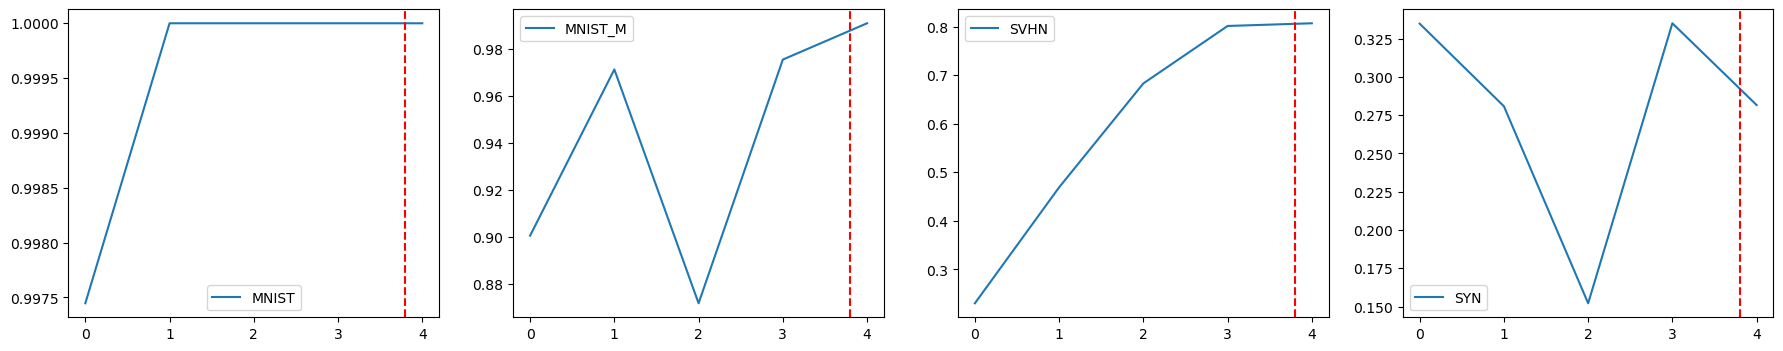

19
MNIST 0.9999999999999996
MNIST_M 0.9907216297825173
SVHN 0.8068063300403008
SYN 0.2815916816675763


In [29]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

In [30]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

tmp = []
for idx, domain in enumerate(domain_list):
    tmp.append(domain_test_trends[domain][metric])
tmp = pd.DataFrame(tmp, index=domain_list)
idx = tmp.mean(axis = 0).idxmax()
print(idx)
pd.concat([tmp, pd.DataFrame(tmp.mean(axis = 0), columns = ["avg"]).T])

3


,0,1,2,3,4
MNIST,0.997446,1.000000,1.000000,1.000000,1.000000
MNIST_M,0.900557,0.971122,0.871836,0.975304,0.990722
SVHN,0.230234,0.468988,0.682974,0.801262,0.806806
SYN,0.334754,0.280802,0.152139,0.334998,0.281592
avg,0.615748,0.680228,0.676737,0.777891,0.769780


### 训练集loss下降趋势

(19,
 array([1.30652392, 0.44538465, 0.33940981, 0.20838319, 0.22365231,
        0.16177248, 0.24347278, 0.15838079, 0.13008181, 0.1244797 ,
        0.0582799 , 0.06405168, 0.03985444, 0.03223517, 0.03975864,
        0.03127118, 0.02713223, 0.01365294, 0.01717315, 0.01005096]))

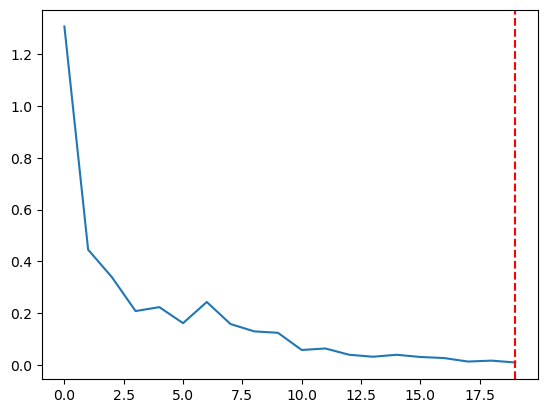

In [31]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([1.1146828 , 0.22439031, 0.17669238, 0.1810133 , 0.27308734,
       0.1326507 , 0.13104591, 0.30566726, 0.13563089, 0.13387095,
       0.07611576, 0.07266063, 0.05600504, 0.05034686, 0.04716979,
       0.04282753, 0.04507467, 0.04245555, 0.04253312, 0.04642932])

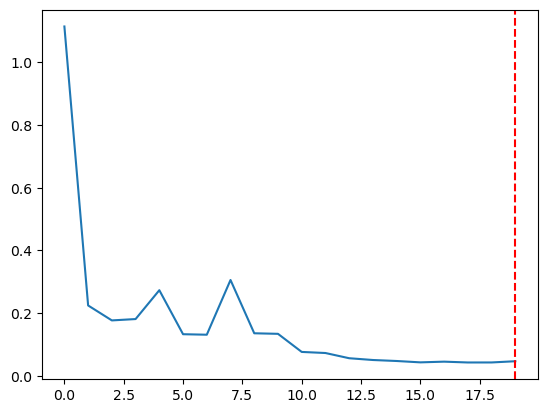

In [32]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.9759481 , 0.99328011, 0.99155023, 0.9940859 , 0.99409699,
       0.98831226, 0.99486582, 0.99517631, 0.98569158, 0.99804465,
       0.99803726, 0.99863236, 0.99833296, 0.99680269, 0.99324684,
       0.99757152, 0.99364234, 0.99386782, 0.99671028, 0.99830709])

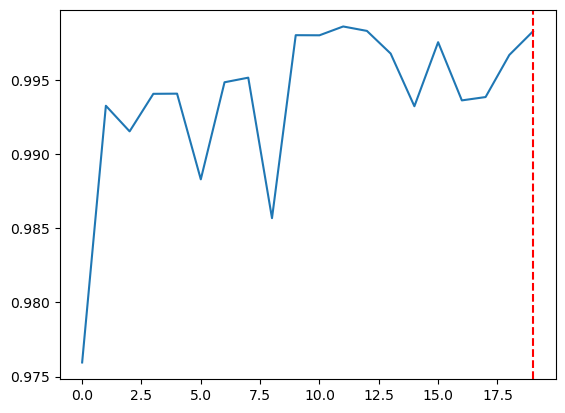

In [33]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.74665313, 0.88378898, 0.90305812, 0.89499336, 0.81398836,
       0.87367753, 0.86424035, 0.84759187, 0.90323137, 0.93520152,
       0.94100298, 0.95438224, 0.95810576, 0.95751673, 0.96002438,
       0.96320787, 0.9625524 , 0.96398185, 0.96403852, 0.96405043])

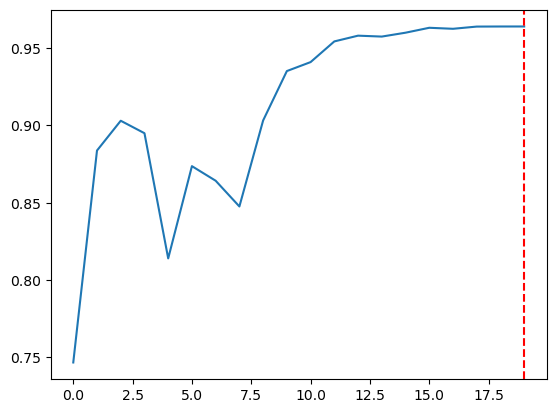

In [34]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

In [35]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

KeyError: 'sub_train_results_loss is not a file in the archive'

In [ ]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [ ]:
# data["sub_train_results_loss"].mean(axis=1)

In [ ]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [ ]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 